In [231]:
#Importing of the necessary packages and modules.

import csv
import math
import statistics
import matplotlib.pyplot as plt

In [232]:
#Initiating variable which has path pf stroopdata file.
data_file = "./stroopdata (1).csv"

#reading of the stroopdata file.
with open(data_file, 'r') as f_in:
    file_reader = csv.DictReader(f_in)
        
    #Initiating blank lists
    congruent = []
    incongruent = []
    for row in file_reader:
        congruent.append(row['Congruent'])
        incongruent.append(row['Incongruent'])
            
    #Converting each string type element of the list to int type.
    congruent = [float(i) for i in congruent]
    incongruent = [float(i) for i in incongruent]
       

In [233]:
def mean(input_list):
    '''This function takes a list and calculates the mean of the list'''
    no_of_element = len(input_list)
    total = sum(input_list)
    mean = total/no_of_element
    return (mean)

In [234]:
def std_dev(input_list):
    '''This function takes a list and calculates the standard deviation of the list'''
    avg = mean(input_list)
    difference_square = [(i - avg)**2 for i in input_list]
    std_dev = sum(difference_square)/(len(input_list) - 1)
    return (math.sqrt(std_dev))

In [235]:
def median(input_list):
    '''This function takes a list and calculates the median of the list'''
    median = statistics.median(input_list)
    return (median) 

# Dependent and independent variables

1)
Dependent variable = Each participant will go through the word and time is recorded from each condition.

Independent variable = participants are presented with a list of words, with each word displayed in a particular color of ink

Treatment = congruent and incongruent conditions.


# Hypothesis

2)

Null hypothesis:

$H_{o}$= Time taken for the participant in congruent and incongruent conditions is equal.
$u_{c} = u_{i}$ or 

\begin{equation} 
%
\\H_o: \mu_{difference} = 0 
%
\end{equation}


Alternate hypothesis:

$H_{A}$= In incongruent, naming the color of the word takes differs and is more prone to errors than when the color of the ink matches the name of the color.

\begin{equation} 
%
\\H_A: \mu_{difference} \neq 0 
%
\end{equation}

Here, we will use 2 tailed dependent sample t-test to test the hypothesis in either direction. Since we only want to check if time taken by congruent method realluy differs from time taken by incongruent method.

We use t-test here since sample size(24) is less than 30 and we dont know the population mean and standard deviation.

The sample distribution looks normal for congruent, whereas there are few outliers for incongruent sample.

We will be using dependent sample t-test because the test is within the subject.


# Descriptive statistics and central tendency measure

In [236]:
print("The mean for the congruent method is :{}".format(mean(congruent)))
print("The SD for the congruent method is :{}".format(std_dev(congruent)))
print("The median for the congruent method is :{}".format(median(congruent)))


The mean for the congruent method is :14.051125
The SD for the congruent method is :3.5593579576451955
The median for the congruent method is :14.3565


In [237]:
print("The mean for the incongruent method is :{}".format(mean(incongruent)))
print("The SD for the incongruent method is :{}".format(std_dev(incongruent)))
print("The median for the incongruent method is :{}".format(median(incongruent)))

The mean for the incongruent method is :22.01591666666667
The SD for the incongruent method is :4.797057122469138
The median for the incongruent method is :21.0175


3)
Mean for the congruent test is = 14.05
Mean for the incongruent test is = 22.01

Median for the congruent test is = 14.35
Median for the incongruent test is = 21.08

The congruent test sampless are more normal and is less widespread as SD is 3.55.
The incongruent test samples are more widespread as SD is 4.79.


# Visualisation and observation from the plot

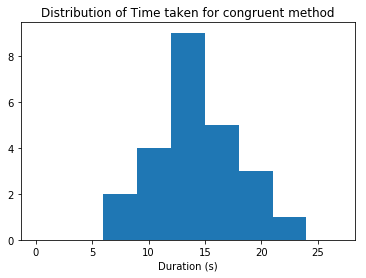

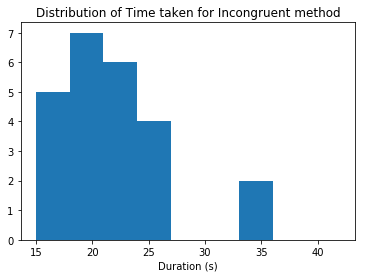

In [238]:
#Histogram plot of the congruent sample
%matplotlib inline
bins = [0,3,6,9,12,15,18,21,24,27]
plt.hist(congruent,bins =bins)
plt.title('Distribution of Time taken for congruent method')
plt.xlabel('Duration (s)')
plt.show()

#Histogram plot of the incongruent sample
%matplotlib inline
bins = [15,18,21,24,27,30,33,36,39,42]
plt.hist(incongruent,bins =bins)
plt.title('Distribution of Time taken for Incongruent method')
plt.xlabel('Duration (s)')
plt.show()

In [239]:
#getting the list of difference between values of sample
diff_list = list(map(lambda c,i:c-i, congruent,incongruent))

#Calculating Standard deviation difference.
std_dev_diff = std_dev(diff_list)

#n = 24//sample size
sample_size = 24

#degree of freedom
dof = sample_size -1

#standard error
se_diff = std_dev_diff/math.sqrt(sample_size)

#Calculating mean difference
mean_diff = mean(congruent) - mean(incongruent)

#Calculating t-statistics
t_statistics = mean_diff/se
print("The t_statistics is :{}".format(t_statistics))

The t_statistics is :-8.020706944109962


The $t_{statistics}$  is far left in t-distribution curve.

4)

Also the congruent sample histograms looks more normal whreas the incongrunet hostograms is positively skewed.

Now for calculating ME we evaluate the ME at $t_{critical}$, if $alpha= 0.05$ for two-tailed test:

# Statistical test and the results

In [240]:
#Margin of Error = tcritical * SME
#t_critical is 2.069 for 1 tailed teste at alpha = 0.05
t_critical = 2.069
margin_of_error = t_critical * se_diff

#Confidence Interval, CI = [MD + ME, MD – ME]
lower_bound = mean_diff + margin_of_error
upper_bound = mean_diff - margin_of_error
print("The confidence interval is [{}, {}]".format(upper_bound, lower_bound))

#Cohen’s D = MD/SD
cohens_d = mean_diff/std_dev_diff
print("The cohen'sd is {}".format(cohens_d))

#r^2(shows percentage variation in y which is explained by all the x variables together)
r_2 =  t_statistics**2/(t_statistics**2 + dof)
print("The r_2 is {}".format(r_2))

The confidence interval is [-10.019367912023053, -5.910215421310283]
The cohen'sd is -1.6372199491222634
The r_2 is 0.7366364161445063


##### Therefor we can reject $H_{o}$ since CI is on extreme left where the probability will be almost 0 and 
also the $t_{statistics}$ << $t_{critical}$.

We can conclude that HA (Alternate hypothesis) is true.

It matches my expectation as majority of the candidates took longer in incongruent method.

5)

Result:

t(24) = -8.02, p<.05, two-tailed

95% CI(-10.019367912023053, -5.910215421310283)

d=-1.64, r2=.73


# Thoughts and similar tasks

6)

Theory: It becomes easier for human mind in congruent method because both the ink and the word are of same color, which enhances the human brain processing speed.

Similar test result might occur for the below tests:

Case1:
1 + 1 =2
2 + 3 =5
6 + 1=7

Case2:
1 + 2 =10
2 + 3 =3
6 + 1 =5

For the case1 sine the equations are true it becomes easier for my mind to process whereas in case2 the equation are false, and it should take more time.


References:

https://docs.python.org/3/library/statistics.html

http://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Typesetting%20Equations.html

https://stackoverflow.com/questions/46011785/how-to-do-superscripts-and-subscripts-in-jupyter-notebook

https://www.danielsoper.com/statcalc/calculator.aspx?id=8
